In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Importing the data from .csv file
df=pd.read_csv('/content/sample_data/Referral_Join_Prediction.csv')

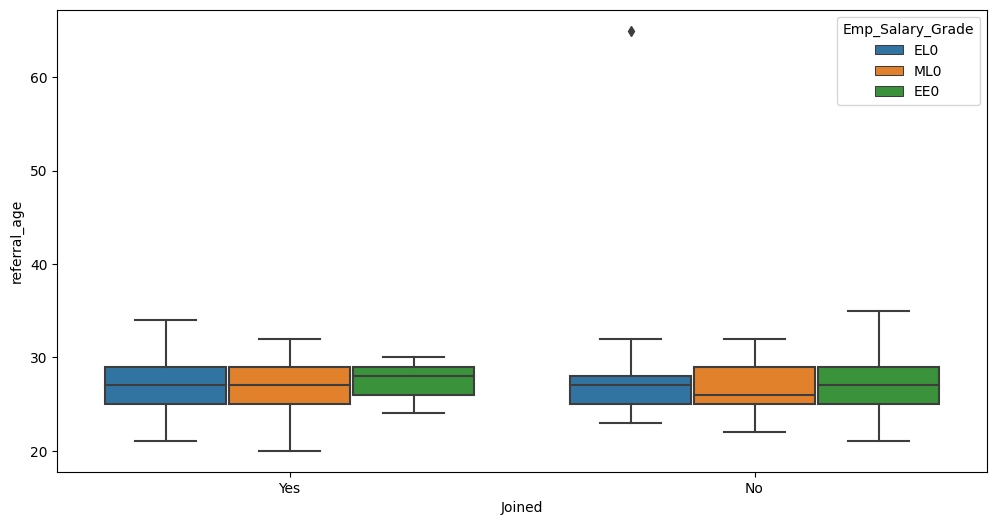

In [53]:
# Multivariate Analysis
# Example-1   (Three Columns)
figsize=(12,6)
fig=plt.subplots(figsize=figsize)
sns.boxplot(data=df,x='Joined',y='referral_age',hue='Emp_Salary_Grade');

In [ ]:
# Example-2  (Four Columns)
g=sns.FacetGrid(df,col='referral_preferred_city',hue='Joined',col_wrap=3,height=3)
g=g.map(plt.scatter,'referral_graduation_marks','referral_expected_sal')
g.add_legend();

In [ ]:
# Data Preparation
# It is for Machine Learning Models

# Scaling
# Outlier Treatment
# Label Encoding

In [13]:
# Scaling
# Dropping the unnecessary columns which do not have any impact on machine learning model.
# In this case, we are dropping the referral_id column
df.drop(axis=1,labels='referral_id', inplace=True)

In [ ]:
# Verifying the referral_id column is deleted permanently or not
df.info()

In [16]:
# Now we are creating two dataframes from the exisiting dataframe which has catagorical and numerical columns
categorical_df=[]
numerical_df=[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_df.append(i)
  else:
    numerical_df.append(i)
print(categorical_df)
print(numerical_df)

['referral_preferred_city', 'referral_gender', 'referral_aptitude_numerical_score', 'referral_aptitude_reasoning_score', 'Emp_Salary_Grade', 'Joined']
['referral_age', 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_12th_marks', 'referral_graduation_marks', 'referral_post_grad_marks', 'referral_expected_sal', 'referral_aptitude_verbal_score', 'referral_Management_Interview_score', 'referral_HR_Interview_score', 'Salary offered']


In [ ]:
# To scaling the numerical columns there are followings methods:
# Method-1: Z-Score
# Method-2: StandardScaler
# Method-3: Min-Max

In [ ]:
# Method-1:  ZScore
from scipy.stats import zscore
scaled_data=df[numerical_df].apply(zscore)
scaled_data

In [ ]:
sns.histplot(df['referral_age'],kde=True)

In [ ]:
sns.histplot(scaled_data['referral_age'],kde=True)

In [ ]:
fig, axes =plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['referral_age'],kde=True, ax=axes[0])
sns.histplot(scaled_data['referral_age'],kde=True,ax=axes[1])
plt.show()

In [ ]:
# Method-2: Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df[numerical_df])
data_standard=scaler.transform(df[numerical_df])
data_standard=pd.DataFrame(data_standard,columns=df[numerical_df].columns)
data_standard

In [ ]:
fig, axes =plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['referral_age'],kde=True, ax=axes[0])
sns.histplot(data_standard['referral_age'],kde=True,ax=axes[1])
plt.show()

In [ ]:
# Method-3: Min Max
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[numerical_df])
data_minmax=scaler.transform(df[numerical_df])
data_minmax=pd.DataFrame(data_minmax,columns=df[numerical_df].columns)
data_minmax

In [ ]:
fig, axes =plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['referral_age'],kde=True, ax=axes[0])
sns.histplot(data_minmax['referral_age'],kde=True,ax=axes[1])
plt.show()

In [ ]:
# Outlier Treatment
# Step-1 Outlier Detection (Box Plot)
# Step-2 Outlier Treatment
# Outlier treatmnent can be done by followings ways:
# (a) Z-Score
# (b) User define function (5 point summary)

In [ ]:
sns.boxplot(x=df['referral_current_salary']);

In [31]:
# Method-1: Z Score
df['referral_current_salary_treatment']=df['referral_current_salary']

In [32]:
df['referral_current_salary_treatment']=(df.referral_current_salary - df.referral_current_salary.mean())/df.referral_current_salary.std()

In [ ]:
# To check the records lies outside the -3 to +3 zscore
df[df['referral_current_salary_treatment'] > 3]

In [ ]:
df[df['referral_current_salary_treatment'] < -3]

In [ ]:
ref_current_salary_impute_value=(3*df.referral_current_salary.std())+df.referral_current_salary.mean()
round(ref_current_salary_impute_value,2)

In [38]:
df['referral_current_salary']=df['referral_current_salary'].replace(853,244.17);

In [40]:
list_indexs=df[df['referral_current_salary_treatment'] > 3].index
#list_indexs
df['referral_current_salary']=np.where(df.index.isin(list_indexs),ref_current_salary_impute_value,df['referral_current_salary'])

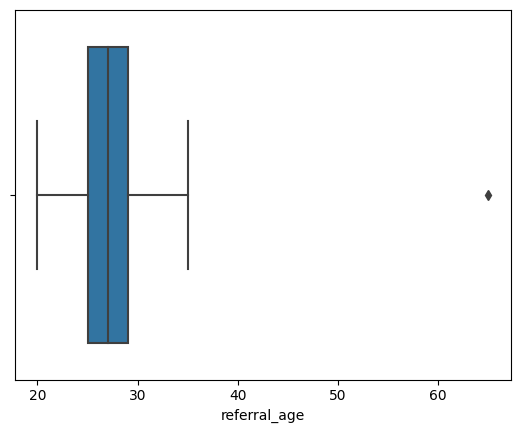

In [51]:
sns.boxplot(x=df['referral_age']);

In [47]:
# Method-2: User defined function
def outlier_treatment(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1 - (1.5 * IQR)
  upper_range=Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [52]:
LR,UR=outlier_treatment(df['referral_age'])
print(LR)
print(UR)

19.0
35.0


In [ ]:
# Rule
# drop the Outlier values
# less than 5% values are in outlier category